# Class 5

In [1]:
import warnings
warnings.filterwarnings('ignore')

In our previous class we discussed NumPy, which in many ways is the cornerstone of the scientific ecosystem of Python. Besides NumPy, there are a few additional libraries which every scientific Python user should know. In this class we will discuss `matplotlib` and `pandas`.

## Data Visualization with `matplotlib`

The most widely-used plotting library in the Python ecosystem is `matplotlib`. It has a number of strong alternatives and complimentary libraries, e.g. `bokeh` and `seaborn`, but in terms of raw features it still has no real contenders.

`matplotlib` allows for _very_ complicated data visualizations, and has two parallel implementations, a procedural one, and an object-oriented one. The procedural one resembles the MATLAB plotting interface very much, allowing for a very quick transition for MATLAB veterans. Evidently, `matplotlib` was initially inspired by MATLAB's approach to visualization.

Having said that, and considering how "old habits die hard", it's important to emphasize that the object-oriented interface is better in the long run, since it complies with more online examples and allows for easier plot manipulations. Finally, the "best" way to visualize your data will be to coerce it into a `seaborn`-like format and use that library to do so. More on that later.

In [2]:
import matplotlib.pyplot as plt  # pyplot is the "scientific" module, 'plt' is the traditional alias
import numpy as np
# for notebooks, not needed for code written somewhere else:
%matplotlib inline

### Procedural Implementation Examples

#### Line plot

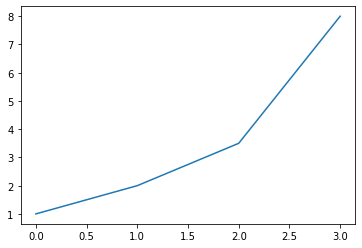

In [3]:
plt.plot([1, 2, 3.5, 8])

```{note}
Note how `matplotlib` returns an object representing the plotted data. To avoid showing that object's memory signature in our output we can simply return that object to a "throwaway variable" to be ignored::

    _ = plt.plot([1, 2, 3.5, 8])

```

#### Scatter plot

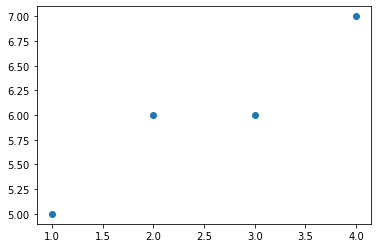

In [4]:
_ = plt.scatter([1, 2, 3, 4], [5, 6, 6, 7])

#### Histogram

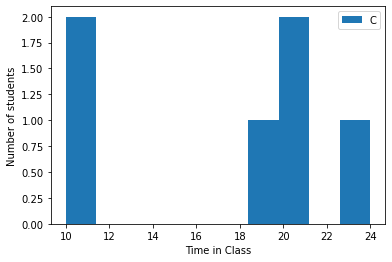

In [5]:
array = np.array([10, 11, 19, 20, 20, 24])
plt.hist(array)  # works with lists as well as numpy arrays
plt.ylabel('Number of students')
plt.xlabel('Time in Class')
_ = plt.legend('C')

### Object-oriented Examples

This time, we will start things off by instantiating the [`Figure`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html) object using `matplotlib`'s [`subplots()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html) function:

```python
fig, ax = plt.subplots()
```

A figure is the "complete" plot, which can contain many subplots, and the axis is the "container" for data itself.

Figures and axes can also be created separately the following two lines:

```python
fig = plt.figure()
ax = fig.add_subplot(111)
```

#### Multiple plots

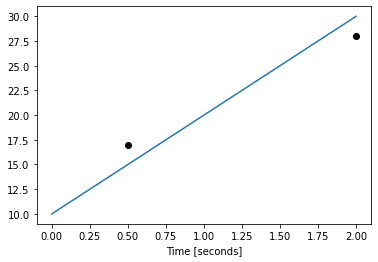

In [6]:
fig, ax = plt.subplots()
ax.plot([10, 20, 30])
ax.scatter([0.5, 2], [17, 28], color='k')
_ = ax.set_xlabel(
    'Time [seconds]'
)  # the two objects inside the axis object have the same scale

To save a plot we could use the `Figure` object's [`savefig()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.figure.Figure.html?highlight=savefig#matplotlib.figure.Figure.savefig) method:

In [7]:
fig.savefig("scattered.pdf", dpi=300, transparent=True)

`matplotlib` is used in conjuction with `numpy` to visualize arrays:

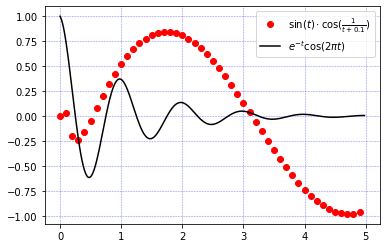

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)


def g(t):
    return np.sin(t) * np.cos(1 / (t + 0.1))


t1 = np.arange(0.0, 5.0, 0.1)  # (start, stop, step)
t2 = np.arange(0.0, 5.0, 0.02)

# Create figure and axis
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)

# Plot g over t1 and f over t2 in one line
ax1.plot(t1, g(t1), 'ro', t2, f(t2), 'k')

# Add grid
ax1.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

# Assigning labels and creating a legend
f_label = r'$e^{-t}\cos(2 \pi t)$'  # Using r'' allows us to use "\" in our strings
g_label = r'$\sin(t) \cdot \cos(\frac{1}{t + 0.1})$'
_ = ax1.legend([g_label, f_label])

### Multiple Axes

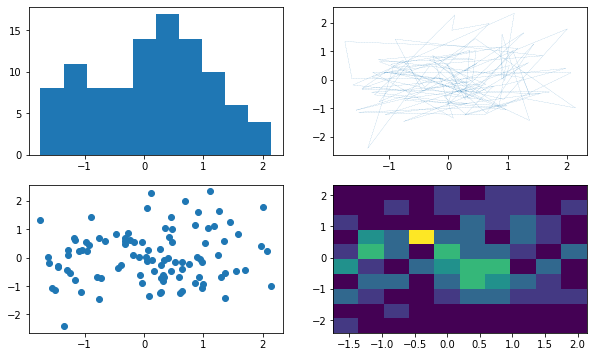

In [9]:
data = np.random.randn(2, 100)  # random numbers from normal distribution

fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # 4 axes in a 2-by-2 grid.
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1], '-.', linewidth=0.15)
_ = axs[1, 1].hist2d(data[0], data[1])

Note that "axes" is a numpy.ndarray instance, and that in order to draw on a specific axis (plot), we start by calling the the specific axis by according to it's location on the array.
```python
type(axs)
```
numpy.ndarray
```python
type(axs[0,0])
```
matplotlib.axes._subplots.AxesSubplot
```python
# when we want to plot:
axs[<row>,<col>].plot(...)
```

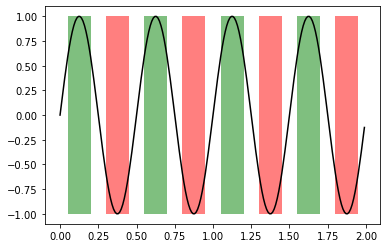

In [9]:
fig, ax = plt.subplots()

x = np.arange(0.0, 2, 0.01)
y = np.sin(4 * np.pi * x)

# Plot line
ax.plot(x, y, color='black')

# Plot patches
ax.fill_between(x, -1, 1, where=y > 0.5, facecolor='green', alpha=0.5)
_ = ax.fill_between(x, -1, 1, where=y < -0.5, facecolor='red', alpha=0.5)

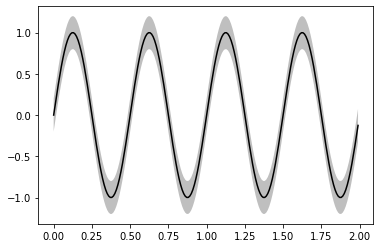

In [10]:
fig, ax = plt.subplots()

x = np.arange(0.0, 2, 0.01)
y = np.sin(4 * np.pi * x)

std = 0.2
y_top = y + std
y_bot = y - std

# Plot line
ax.plot(x, y, color='black')

# Plot STD margin
_ = ax.fill_between(x, y_bot, y_top, facecolor='gray', alpha=0.5)

Using `matplotlib`'s [`style`](https://matplotlib.org/3.3.2/api/style_api.html#module-matplotlib.style) objects open up a world of possibilities. 

To display available predefined styles:

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Usage example:

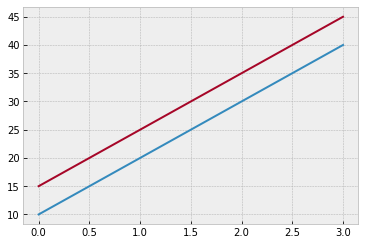

In [12]:
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.plot([10, 20, 30, 40])
_ = ax.plot([15, 25, 35, 45])

## SciPy

[SciPy](https://www.scipy.org/) is a large library consisting of many smaller modules, each targeting a single field of scientific computing.

Available modules include `scipy.stats`, `scipy.linalg`, `scipy.fftpack`, `scipy.signal` and many more.

Because of its extremely wide scope of available use-cases, we won't go through all of them. All you need to do is to remember that many functions that you're used to find in different MATLAB toolboxes are located somewhere in SciPy. 

Below you'll find a few particularly interesting use-cases.

### *.mat* files input\output

In [13]:
from scipy import io as spio

a = np.ones((3, 3))

spio.savemat('file.mat', {'a': a})  # savemat expects a dictionary

data = spio.loadmat('file.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Nov  1 19:33:49 2020',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])}

### Linear algebra

In [14]:
from scipy import linalg

# Singular Value Decomposition
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

# Inverse of square matrix
arr = np.array([[1, 2], [3, 4]])
iarr = linalg.inv(arr)

#### Curve fitting

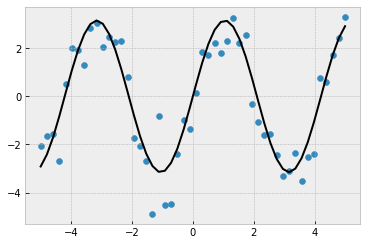

In [15]:
from scipy import optimize


def test_func(x, a, b):
    return a * np.sin(b * x)


# Create noisy data
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)

params, params_covariance = optimize.curve_fit(test_func,
                                               x_data,
                                               y_data,
                                               p0=[3, 1])
_ = ax.plot(x_data, test_func(x_data, params[0], params[1]), 'k')

### Statistics

Ttest_indResult(statistic=-3.191222637242117, pvalue=0.0018554188331865297)

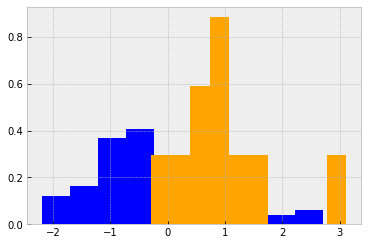

In [16]:
from scipy import stats

a = np.random.normal(loc=0, scale=1, size=100)
b = np.random.normal(loc=1, scale=1, size=10)
fig, ax = plt.subplots()
ax.hist(a, color='b', density=True)
ax.hist(b, color='orange', density=True)

# Calculate the T-test for the means of two independent samples of scores
stats.ttest_ind(a, b)

## IPython

IPython is the REPL in which this text is written in. As stated, it's the most popular "command window" of Python. When most Python programmers wish to write and execute a small Python script, they won't use the regular Python interpreter, accessible with `python my_file.py`. Instead, they will run it with IPython since it has more features. For instance, the popular MATLAB feature which saves the variables that returned from the script you ran is accessible when running a script as `ipython -i my_file.py`.

Let's examine some of IPython's other features, accessible by using the `%` _magic_ operator before writing your actual code:

### `%%timeit` - micro-benchmarking

In [17]:
def loop_and_sum(lst):
    """ Loop and some a list """
    sum = 0
    for item in lst:
        sum += item

In [18]:
%timeit loop_and_sum([1, 2, 3, 4, 5])

279 ns ± 6.03 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
%timeit loop_and_sum(list(range(10000)))

498 µs ± 8.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### `%%prun` - benchmark each function line

In [20]:
%%prun
data1 = np.arange(500000)
data2 = np.zeros(500000)
ans = data1 + data2 + data1 * data2
loop_and_sum(list(np.arange(10000)))
data1 @ data2

### `%run` - run external script

In [21]:
%run import_demonstration/my_app/print_the_time.py

1604252036.6481867


<Figure size 432x288 with 0 Axes>

### `%matplotlib [notebook\inline]`

Easily display `matplotlib` figures inside the notebook.

### `%reset`

Resets the namespace.

### LaTeX support

Render the cell as $\LaTeX$:

$a^2 + b^2 = c^2$

$e^{i\pi} + 1 = 0$

## `scikit-image`

[`scikit-image`](https://scikit-image.org/) is one of the main image processing libraries in Python. We'll look at it in greater interest later in the semester, but for now let's examine some of its algorithms:

### Edge detection

In [2]:
from skimage import data, io, filters

image = data.coins()
io.imshow(image)
edges = filters.sobel(image)  # edge-detection filter
plt.figure()
_ = io.imshow(edges)

ModuleNotFoundError: No module named 'skimage'

### Segmentation using a "random walker" algorithm

In [ ]:
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
import skimage

# Generate noisy synthetic data
data1 = skimage.img_as_float(binary_blobs(length=128, seed=1))  # data
data1 += 0.35 * np.random.randn(*data1.shape)  # added noise
markers = np.zeros(data1.shape, dtype=np.uint)
markers[data1 < -0.3] = 1
markers[data1 > 1.3] = 2

# Run random walker algorithm
labels = random_walker(data1, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1,
                                    3,
                                    figsize=(8, 3.2),
                                    sharex=True,
                                    sharey=True)
ax1.imshow(data1, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_adjustable('box')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='hot', interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_adjustable('box')
ax3.set_title('Segmentation')

fig.tight_layout()

### Template matching

In [ ]:
from skimage.feature import match_template

image = skimage.data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box')

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y),
                     wcoin,
                     hcoin,
                     edgecolor='r',
                     facecolor='none',
                     linewidth=2)
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

## Exercise

Perform these exercises using the object-oriented interface of `matplotlib`. Search for the proper methods from the different SciPy and `matplotlib` modules.

1. Create 1000 normally-distributed points. Histogram them. Overlay the histogram with a dashed line showing the theoretical normal distribution we would expect from the data.
2. Create a (1000, 3)-shaped matrix of uniformly distributed points between [0, 1). Create a scatter plot with the first two columns as the $x$ and $y$ columns, while the third should control the size of the created point.

3. Using `np.random.choice`, "roll a die" 100 times. Create a 6x1 figure panel with a shared $x$-axis containing values between 0 and 10000 (exclusive). The first panel should show a vector with a value of 1 everywhere the die roll came out as 1, and 0 elsewhere. The second panel should show a vector with a value of 1 everywhere the die roll came out as 2, and 0 elsewhere, and so on. Create a title for the entire figure. The $y$-axis of each panel should indicate the value this plot refers to.

### Exercise solutions below...

In [ ]:
# 1
plt.style.use('fivethirtyeight')
import scipy.stats

data = np.random.randn(1000)
x_axis = np.arange(-4, 4, 0.001)

fig, ax = plt.subplots()
ax.hist(data, bins=30,
        density=True)  # the "density" keyword simplifies the scaling
ax.plot(x_axis, scipy.stats.norm.pdf(x_axis, 0, 1), '--')

In [ ]:
# 2
data = np.random.random((1000, 3))
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=data[:, 2] * 50)

In [ ]:
# 3
plt.style.use('ggplot')
die = np.arange(1, 7)
num = 100
rolls = np.random.choice(die, num)
fig, ax = plt.subplots(6, 1, sharex=True)
for roll, axis in enumerate(ax, 1):
    axis.scatter(np.arange(num), rolls == roll,
                 s=5)  # notice how we plot a boolean vector
    axis.set_ylabel(roll)
    axis.yaxis.set_ticks([])

axis.set_xlim([0, num])
axis.set_xlabel('Roll number')
fig.suptitle('Dice Roll Distribution')
fig.text(0.01,
         0.5,
         'Roll value',
         ha='center',
         va='center',
         rotation='vertical')

## Data Analysis with `pandas`

A large part of what makes Python so popular nowadays is `pandas`, or the "Python data analysis library".

`pandas` has been around since 2008, and while in itself it's built on the solid foundations of `numpy`, it introduced a vast array of important features that can hardly be found anywhere outside of the Python ecosystem.

The general priniciple in working with `pandas` is to first look up in its immense codebase (via its docs), or somewhere online, an existing function that does exactly what you're looking for, and if you can't - only then should you implement it youself.

Much of the discussion below is taken from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), by Jake VanderPlas. Be sure to check it out if you need further help with one of the topics.

### The need for `pandas`

With only _clean_ data in the world, `pandas` wouldn't be as necessary. By clean we mean that all of our data was sampled properly, without any missing data points. We also mean that the data is homogeneous, i.e. of a single type (floats, ints), and one-dimensional. 

An example of this simple data might be an electrophysiological measurement of a neuron's votlage over time, a calcium trace of a single imaged neuron and other simple cases such as these.

`pandas` provide flexibility for our numerical computing tasks via its two main data types: `DataFrame` and `Series`, which are multi-puporse data containers with very useful features, which you'll soon learn about.

Mastering `pandas` is one of the most important goals of this course. Your work as scientists will be greatly simplified if you'll feel comfortable in the `pandas` jungle.

### Series

A `pandas` series is generalization of a simple `numpy` array. It's the basic building block of `pandas` objects.

In [4]:
import numpy as np
import pandas as pd  # customary import
import matplotlib.pyplot as plt

In [6]:
series = pd.Series([50., 100., 150., 200.], name='ca_cell1')
# the first argument is the data argument, list-like, just like for numpy

series

0     50.0
1    100.0
2    150.0
3    200.0
Name: ca_cell1, dtype: float64

We received a series instance with our values and an associated index. The index was given automatically, and it defaults to ordinal numbers. Notice how the data is displayed as a column. This is because the pandas library deals with tabular data. 

We can access the internal arrays, data and indices, by using the `array` and `index` attributes:

In [7]:
series.array  # a PandasArray is almost always identical to a numpy array (it's a wrapper)

<PandasArray>
[50.0, 100.0, 150.0, 200.0]
Length: 4, dtype: float64

Note that in many places you'll see `series.values` used when trying to access the raw data. This is no longer encouraged, and you should generally use either `series.array` or, even better, `series.to_numpy()`.

In [9]:
series.index  # special pandas index object

RangeIndex(start=0, stop=4, step=1)

The index of the array is a true __index__, just like that of a dictionary, making item access pretty intuitive:

In [12]:
series[1]

100.0

In [13]:
series[:3]  # non-inclusive index

0     50.0
1    100.0
2    150.0
Name: ca_cell1, dtype: float64

While this feature is very similar to a `numpy` array's index, a series can also have non-integer indices:

In [14]:
data = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
data

a    1
b    2
c    3
d    4
dtype: int64

In [15]:
data['c']  # as expected

3

In [16]:
data2 = pd.Series(10, index=['first', 'second', 'third'])
data2

first     10
second    10
third     10
dtype: int64

The index of a series is one of its most important features. It also strengthens the analogy of a series to an enhanced Python dictionary. The main difference between a series and a dictionary lies in its _vectorization_ - data inside a series can be processed in a vectorized manner, just like you would act upon a standard `numpy` array.

#### Series Instantiation

Simplest form:

In [17]:
series = pd.Series([1, 2, 3])
series  # indices and dtype inferred

0    1
1    2
2    3
dtype: int64

Or, very similarly:

In [18]:
series = pd.Series(np.arange(10, 20, dtype=np.uint8))
series

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: uint8

Indices can be specified, as we've seen:

In [19]:
series = pd.Series(['a', 'b', 'c'], index=['A', 'B', 'C'])
series  # dtype is "object", due to the underlying numpy array

A    a
B    b
C    c
dtype: object

A series (and a DataFrame) can be composed out of a dictionary as well:

In [30]:
continents = dict(Europe=10, Africa=21, America=9, Asia=9, Australia=19)
continents_series = pd.Series(continents)
continents_series

Europe       10
Africa       21
America       9
Asia          9
Australia    19
dtype: int64

Notice how the right `dtype` was inferred automatically. 

When creating a series from a dictionary, the importance of the index is revealed again:

In [24]:
series_1 = pd.Series({'a': 1, 'b': 2, 'c': 3}, index=['a', 'b'])
print(f"Indices override the data:\n{series_1}")

series_2 = pd.Series({'a': 1, 'b': 2, 'c': 3}, index=['a', 'b', 'c', 'd'])
print(f"Indices can add NaNs:\n{series_2}")

Indices override the data:
a    1
b    2
dtype: int64
Indices can add NaNs:
a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64


We can also use slicing on these non-numeric indices:

In [26]:
print(continents_series)
print("-----")
continents_series['America':'Australia']

Europe       10
Africa       21
America       9
Asia          9
Australia    19
dtype: int64
-----


America       9
Asia          9
Australia    19
dtype: int64

```{note}
Note the **inclusive** last index - string indices are inclusive on both ends. This makes more sense when using location-based indices, since in day-to-day speak we regulary talk with "inclusive" indices - "hand me over the tests of students 1-5" obviously refers to 5 students, not 4.
```

We'll dicuss pandas indexing extensively later on, but I do want to point out now that indexes can be non-unique:

In [27]:
series = pd.Series(np.arange(5), index=[1, 1, 2, 2, 3])
series

1    0
1    1
2    2
2    3
3    4
dtype: int64

A few operations require a unique index, making them raise an exception, but most operations should work seamlessly.

Lastly, series objects can have a name attached to them as well:

In [29]:
named_series = pd.Series([1, 2, 3], name='Data')
unnamed_series = pd.Series([2, 3, 4])
unnamed_series.rename("Unnamed")

0    2
1    3
2    4
Name: Unnamed, dtype: int64

### DataFrame

A `DataFrame` is a concatenation of multiple `Series` objects that share the same index. It's a generalization of a two dimensional `numpy` array.

You can also think of it as a dictionary of `Series` objects, as a database table, or a spreadsheet.

Due to its flexibility, `DataFrame` is the more widely used data structure.

In [31]:
# First we define a second series
populations = pd.Series(
    dict(Europe=100., Africa=907.8, America=700.1, Asia=2230., Australia=73.7))
populations

Europe        100.0
Africa        907.8
America       700.1
Asia         2230.0
Australia      73.7
dtype: float64

In [34]:
olympics = pd.DataFrame({'population': populations, 'medals': continents})
olympics

,population,medals
Europe,100.0,10
Africa,907.8,21
America,700.1,9
Asia,2230.0,9
Australia,73.7,19


A dataframe has a row index ("index") and a column index (columns):

In [40]:
print(f"Index:\t\t{olympics.index}")
print(f"Columns:\t{olympics.columns}")  # new

Index:		Index(['Europe', 'Africa', 'America', 'Asia', 'Australia'], dtype='object')
Columns:	Index(['population', 'medals'], dtype='object')


#### Instantiation

Creating a dataframe can be done in one of several ways:
- Dictionary of 1D numpy arrays, lists, dictionaries or Series
- A 2D numpy array
- A Series
- A different dataframe

Alongside the data itself, you can pass two important arguments to the constructor:
- `columns` - An iterable of the headers of each data column.
- `index` - Similar to a series.

Just like in the case of the series, passing these arguments ensures that the resulting dataframe will contain these specific columns and indices, which might lead to `NaN`s in certain rows and\or columns.

In [41]:
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Again, rows will be dropped for missing indices:

In [42]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


A column of `NaN`s is forced in the case of a missing column:

In [43]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


A 1D dataframe is also possible:

In [45]:
df1d = pd.DataFrame([1, 2, 3], columns=['data'])
# notice the iterable in the columns argument

df1d

,data
0,1
1,2
2,3


In [46]:
df_from_array = pd.DataFrame((np.random.random((2, 10))))
df_from_array

,0,1,2,3,4,5,6,7,8,9
0,0.453869,0.216093,0.014364,0.764031,0.991121,0.711321,0.843130,0.550375,0.755943,0.637068
1,0.707846,0.605237,0.948735,0.451370,0.491832,0.643827,0.023619,0.352374,0.852440,0.942574


### Columnar Operations

If we continue with the dictionary analogy, we can observe how intuitive the operations on series and dataframe columns can be:

In [47]:
olympics

,population,medals
Europe,100.0,10
Africa,907.8,21
America,700.1,9
Asia,2230.0,9
Australia,73.7,19


A dataframe can be thought of as a dictionary. Thus, accessing a column is done in the following manner:

In [48]:
olympics['population']  # a column of a dataframe is a series object

Europe        100.0
Africa        907.8
America       700.1
Asia         2230.0
Australia      73.7
Name: population, dtype: float64

This will definitely be one of your main sources of confusion - in a 2D array, `arr[0]` will return the first _row_. In a dataframe, `df['col0']` will return the first column. Thus, the dictionary analogy might be better suited for indexing operations.

To show a few operations on a dataframe, let's remind ourselves of the `df` variable:

In [49]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


First we see that we can access columns using standard dot notation as well (although it's usually not recommended):

In [50]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

Can you guess what will these two operations do?

In [51]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2

In [52]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted with `del`, or popped like a dictionary:

In [53]:
three = df.pop('three')
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

Insertion of some scalar value will propagate throughout the column:

In [ ]:
df['foo'] = 'bar'
df

### Simple plotting

You can plot dataframes and series objects quite easily using the `plot()` method:

/home/flavus/Projects/labbing/ml_for_neuro/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


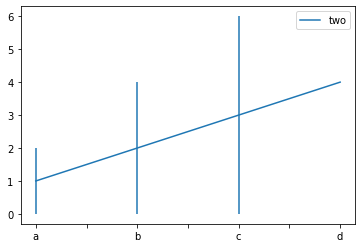

In [56]:
_ = df.plot(kind='line', y='two', yerr='one')

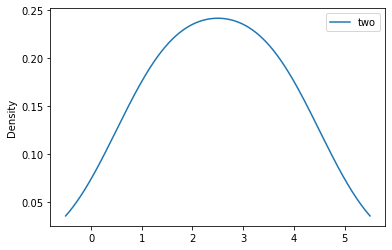

In [57]:
_ = df.plot(kind='density', y='two')

More plotting methods will be shown in class 8.

#### The `assign` method

There's a more powerful way to insert a column into a dataframe, using the assign method:

In [58]:
olympics_new = olympics.assign(rel_medals=olympics['medals'] /
                               olympics['population'])
olympics_new  # copy of olympics

,population,medals,rel_medals
Europe,100.0,10,0.100000
Africa,907.8,21,0.023133
America,700.1,9,0.012855
Asia,2230.0,9,0.004036
Australia,73.7,19,0.257802


But `assign()` can also help us do more complicated stuff:

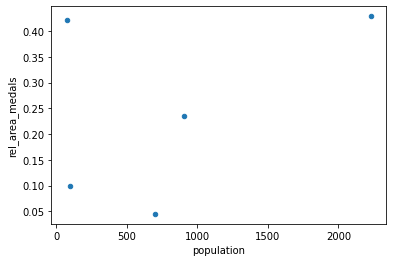

In [77]:
# We create a intermediate dataframe and run the calculations on it
area = [100, 89, 200, 21, 45]
olympics_new["area"] = area
olympics_new.assign(rel_area_medals=lambda x: x.medals / x.area).plot(
    kind='scatter', x='population', y='rel_area_medals')
plt.show()

````{note}

The `lambda` expression is an anonymous function (like MATLAB's `@` symbol) and its argument `x` is the intermediate dataframe we're handling. A simpler example might look like:

```python
y = lambda x: x + 1
y(3) == 4
```
````

### Indexing

`pandas` indexing can be seem complicated at times due to its high flexibility. However, its relative importance should motivate you to overcome this initial barrier.

The `pandas` documentation summarizes it in the following manner:

|Operation|Syntax|Result|
|--------|-------|------|
|Select column| `df[col], df.col` | Series|
|Select row by label| `df.loc[row_label]` | Series|
|Select row by integer location| `df.iloc[intloc]` | Series|
|Slice rows| `df[5:10]` | DataFrame|
|Select rows by boolean vector| `df[bool_vec]` or `df.loc[bool_vec]` or `df.iloc[bool_vec]` | DataFrame|

Another helpful summary is the following:
* Like lists, you can index by integer position (`df.iloc[intloc]`).
* Like dictionaries, you can index by label (`df[col]` or `df.loc[row_label]`).
* Like NumPy arrays, you can index with boolean masks (`df[bool_vec]`).
* Any of these indexers could be scalar indexes, or they could be arrays, or they could be slices.
* Any of these should work on the index (=row labels) or columns of a DataFrame.
* And any of these should work on hierarchical indexes (we'll discuss hierarchical indices later).

Let's see what all the fuss is about:

In [61]:
df

,one,two,flag
a,1.0,1.0,False
b,2.0,2.0,False
c,3.0,3.0,True
d,NaN,4.0,False


#### `.loc`
`.loc` is primarily label based, but may also be used with a boolean array. `.loc` will raise `KeyError` when the items are not found. Allowed inputs are:

- A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index. This use is not an integer position along the index)

- A list or array of labels ['a', 'b', 'c']

- A slice object with labels `'a':'f'` (note that contrary to usual python slices, both the start and the stop are included, when present in the index! - also see Slicing with labels)

- A boolean array

- A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)

In [62]:
df.loc['a']  # a series is returned

one         1
two         1
flag    False
Name: a, dtype: object

In [63]:
df.loc['a':'b']  # two items!

,one,two,flag
a,1.0,1.0,False
b,2.0,2.0,False


Using characters is always inclusive on both ends. This is because it's more "natural" this way, according to `pandas` devs. As natural as it may be, it's definitely confusing.

In [64]:
df.loc[[True, False, True, False]]

,one,two,flag
a,1.0,1.0,False
c,3.0,3.0,True


2D indexing also works:

In [65]:
df.loc['c', 'flag']

True

#### `.iloc`
`.iloc` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. `.iloc` will raise `IndexError` if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/`numpy` slice semantics). Allowed inputs are:

- An integer, e.g. `5`

- A list or array of integers `[4, 3, 0]`

- A slice object with ints `1:7`

- A boolean array

- A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)

In [66]:
df.iloc[1:3]

,one,two,flag
b,2.0,2.0,False
c,3.0,3.0,True


In [67]:
df.iloc[[True, False, True, False]]

,one,two,flag
a,1.0,1.0,False
c,3.0,3.0,True


In [68]:
df

,one,two,flag
a,1.0,1.0,False
b,2.0,2.0,False
c,3.0,3.0,True
d,NaN,4.0,False


2D indexing works as expected:

In [69]:
df.iloc[2, 0]

3.0

We can also slice rows in a more intuitive fashion:

In [ ]:
df[1:10]

Notice how no exception was raised even though we tried to slice _outside_ the dataframe boundary. This conforms to standard Python and `numpy` behavior.

This slice notation (without `.iloc` or `.loc`) works fine, but it sometimes counter-intuitive. Try this example:

In [70]:
df2 = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]],
                   columns=['A', 'B', 'C', 'D'],
                   index=[10, 20])
df2

,A,B,C,D
10,1,2,3,4
20,5,6,7,8


In [71]:
df2[1:]  # we succeed with slicing

,A,B,C,D
20,5,6,7,8


In [72]:
df2[1]  # we fail, since the key "1" isn't in the columns
# df2[10] - this also fails

KeyError: 1

This is why we generally prefer indexing with either `.loc` or `.iloc` - we know what we're after, and we explicitly write it.

### Indexing with `query` and `where`

#### Exercise

1. Basics #1:
    - Create a mock `pd.Series` containing the number of autonomous cars in different cities in Israel. Use proper naming and datatypes, and have at least 7 data points.
    - Show the mean, standard deviation and median of the Series.
    - Create another mock Series for the population counts of the cities you used in question 1.
    - Make a DataFrame from both series and plot (scatter plot) the number of autonomous cars as a function of the population using the pandas' API only, without a direct call to matplotlib (besides `plt.show()`).
    
1. Basics #2:
    - Create three random `pd.Series` and generate a `pd.DataFrame` from them. Name each series, but make sure to use the same, non-numeric, index for the different series. 
    - Display the underlying numpy array.
    - Create a new column from the addition of two of the columns without the `assign()` method.
    - Create a new column from the multiplication of two of the columns using `assign()`, and plot the result.
    - Take the sine of the entire DF.

2. Dates and times in pandas:
    - Create a DataFrame with at least two columns, a _datetime index_ (look at `pd.date_range`) and random data. 
    - Convert the dtype of one of the columns (int <-> float).
    - View the top and bottom of the dataframe using the `head` and `tail` methods. Make sure to visit `describe()` as well.
    - Use the `sort_value` by column values to sort your DF. What happened to the indices?
    - Re-sort the dataframe with the `sort_index` method.
    - Display the value in the third row, at the second column. What's the most well suited indexing method?
   
3. DataFrame comparisons and operations:
    - Generate another DataFrame with at least two columns. Populate it with random values between -1 and 1.
    - Find the places where the dataframe contains negative values, and replace them with their positive inverse (-0.21 turns to 0.21). 
    - Set one of the values to NaN using `.loc`.
    - Drop the entire column containing this null value.

#### Exercise solutions below...

#### 1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = {
    'Tel Aviv': 123,
    'Jerusalem': 115,
    'Haifa': 80,
    'Beer Sheva': 95,
    'Rishon Lezion': 70,
    'Netanya': 70,
    'Petah Tikva': 62
}
cars_ser = pd.Series(data, name='autocars')  # dtype is int64 automatically
cars_ser.describe()

In [ ]:
population = {
    'Tel Aviv': 750.2,
    'Jerusalem': 900.,
    'Haifa': 700.9,
    'Beer Sheva': 650.4,
    'Rishon Lezion': 561.6,
    'Netanya': 400.6,
    'Petah Tikva': 390.1
}
pop_ser = pd.Series(population, name='population')
pop_ser

In [ ]:
df_auto = pd.DataFrame({'cars': cars_ser, 'pop': pop_ser})
df_auto.plot(x='pop', y='cars', kind='scatter')

#### 2

In [ ]:
import string

data = np.random.random((3, 10))
col0, col1, col2 = data  # unpacking

index = list(string.ascii_lowercase[:10])
ser0 = pd.Series(col0, index=index, name='one')
ser1 = pd.Series(col1, index=index, name='two')
ser2 = pd.Series(col2, index=index, name='three')
ser2

In [ ]:
df_from_series = pd.DataFrame({
    ser0.name: ser0,
    ser1.name: ser1,
    ser2.name: ser2
})
df_from_series

In [ ]:
df_from_series['four'] = df_from_series.one + df_from_series.three
df_from_series

In [ ]:
df_from_series.assign(five=df_from_series.two * df_from_series.three).plot(
    kind='scatter', x='one', y='five')

In [ ]:
np.sin(
    df_from_series
)  # no need for data transformations, or to use the `.to_numpy()` method

#### 3

In [ ]:
dates = pd.date_range(start='20180101', periods=6, freq='M')
dates  # examine the dates we were given

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4),
                  index=dates,
                  columns=list('A B C D'.split()))
df.loc['20180331', 'C'] = np.nan
df

In [ ]:
df.A = df.A.astype(int)
df.head(3)  # shows the 3 top entries. df.tail() also works

In [ ]:
df.describe()

In [ ]:
# When we sort the dataframe by the values, the indices must stay with the data! That's the point.
df.sort_values(
    by='C', inplace=True,
    na_position='last')  # ascending by default, place the nans at the end
df

In [ ]:
df2 = df.copy()
df2.sort_index()

In [ ]:
df2  # unsorted, because we haven't used the inplace keyword

In [ ]:
# Third row, second column
df2.iloc[2, 1]

In [ ]:
ran = np.random.random((10))
ran.std()

#### 4

In [ ]:
arr = np.random.random((15, 2)) * 2 - 1
df = pd.DataFrame(arr, columns=['back', 'front'])
df

In [ ]:
df[df < 0] = -df
df

In [ ]:
# Drop the column with the NaN
df.loc[14, 'back'] = np.nan
df.dropna(axis='columns', how='any')